In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

In [2]:
#Data Augmentation can be done on the fly (e.g., image data generator) or statically (adding more to the dataset before training)

#Horizontal flipping only. Doesn't make sense to vertical flip
#Brightness
#Centre offsetting
#Zoom

#ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data.

#How Keras ImageDataGenerator Works: - works on the fly (essential for larger datasets that can't fit in memory)

#Take a batch of images used for training.
#Apply random transformations to each image in the batch.
#Replacing the original batch of images with a new randomly transformed batch.
#Train a Deep Learning model on this transformed batch.

In [3]:
X = np.load('features.npy')
y = np.load('labels.npy')
X.shape

(2481, 75, 75, 1)

In [4]:
#   tf.keras.preprocessing.image.ImageDataGenerator(
    #featurewise_center=False, samplewise_center=False,
    #featurewise_std_normalization=False, samplewise_std_normalization=False,
    #zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    #height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    #channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    #horizontal_flip=False, vertical_flip=False, rescale=None,
    #preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None

In [5]:
#Create an exponentially decreasing learning rate after 5 epochs
def exp_lr(epoch, lr):
    if epoch <=5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

exp_learning_rate_schedule = keras.callbacks.LearningRateScheduler(exp_lr)

In [6]:
train_data_img_gen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True,
                                                  rotation_range = 20, width_shift_range = 0.2,
                                                  horizontal_flip = True, validation_split = 0.2, height_shift_range = 0.2)
train_data_img_gen.fit(X)

In [8]:
#simple model to test
s_model = keras.models.Sequential([
    keras.layers.Conv2D(16, (5,5), input_shape = [75, 75, 1], activation = 'relu'),
    keras.layers.Conv2D(16, (3,3), activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

#s_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
#s_model.fit(train_data_img_gen.flow(X, y, batch_size = 32, subset = 'training'),
            #validation_data = train_data_img_gen.flow(X, y, batch_size = 8, subset = 'validation'),
           #steps_per_epoch = len(X) / 128, epochs = 20)

Epoch 1/20
20/19 [==============================] - 24s 1s/step - loss: 0.6905 - accuracy: 0.6422 - auc_3: 0.6896 - val_loss: 3.6795 - val_accuracy: 0.5222 - val_auc_3: 0.6171
Epoch 2/20
20/19 [==============================] - 23s 1s/step - loss: 0.5905 - accuracy: 0.6875 - auc_3: 0.7582 - val_loss: 1.6305 - val_accuracy: 0.6210 - val_auc_3: 0.7553
Epoch 3/20
20/19 [==============================] - 22s 1s/step - loss: 0.5290 - accuracy: 0.7437 - auc_3: 0.8160 - val_loss: 1.8572 - val_accuracy: 0.5323 - val_auc_3: 0.7993
Epoch 4/20
20/19 [==============================] - 18s 918ms/step - loss: 0.4888 - accuracy: 0.7619 - auc_3: 0.8441 - val_loss: 1.6282 - val_accuracy: 0.5887 - val_auc_3: 0.8109
Epoch 5/20
20/19 [==============================] - 20s 989ms/step - loss: 0.5105 - accuracy: 0.7484 - auc_3: 0.8299 - val_loss: 1.2422 - val_accuracy: 0.5847 - val_auc_3: 0.8287
Epoch 6/20
20/19 [==============================] - 20s 982ms/step - loss: 0.4914 - accuracy: 0.7828 - auc_3: 0.84

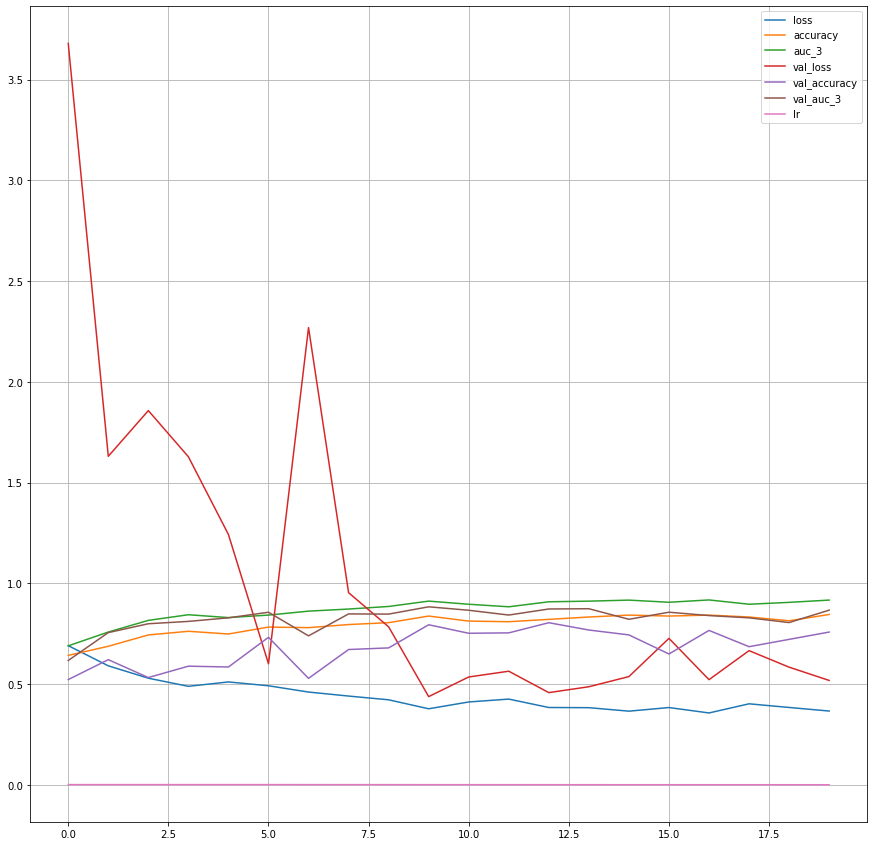

In [13]:
#model 1
m1 = keras.models.Sequential([
    keras.layers.Conv2D(32, (5,5), input_shape = [75, 75, 1], kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32, kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    
    keras.layers.Dense(1, activation = 'sigmoid')
])

m1.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy', keras.metrics.AUC()])
m1_history = m1.fit(train_data_img_gen.flow(X, y, batch_size = 32, subset = 'training'),
            validation_data = train_data_img_gen.flow(X, y, batch_size = 8, subset = 'validation'),
           steps_per_epoch = len(X) / 128, epochs = 20, callbacks = [exp_learning_rate_schedule])

pd.DataFrame(m1_history.history).plot(figsize=(15,15))
plt.grid(True)
plt.show()


In [17]:
#model 2 - doubled filters; DO 0.3; some reg
#OVERFITTING

m2 = keras.models.Sequential([
    keras.layers.Conv2D(64, (5,5), input_shape = [75, 75, 1], kernel_initializer = 'he_normal', padding = 'same', kernel_regularizer = keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Conv2D(128, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, kernel_initializer = 'he_normal', kernel_regularizer = keras.regularizers.l1_l2(0.01, 0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, kernel_initializer = 'he_normal', kernel_regularizer = keras.regularizers.l1_l2(0.01, 0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.3),
    
    
    keras.layers.Dense(1, activation = 'sigmoid')
])

#m2.compile(loss = 'binary_crossentropy', optimizer = 'Nadam', metrics = ['accuracy', keras.metrics.AUC()])
#m2_history = m2.fit(train_data_img_gen.flow(X, y, batch_size = 32, subset = 'training'),
#validation_data = train_data_img_gen.flow(X, y, batch_size = 8, subset = 'validation'),
#steps_per_epoch = len(X) / 128, epochs = 30, callbacks = [exp_learning_rate_schedule])

#pd.DataFrame(m2_history.history).plot(figsize=(15,15))
#plt.grid(True)
#plt.show()


Epoch 1/20
20/19 [==============================] - 22s 1s/step - loss: 0.8394 - accuracy: 0.6000 - auc_5: 0.6192 - val_loss: 3.6573 - val_accuracy: 0.5222 - val_auc_5: 0.5265
Epoch 2/20
20/19 [==============================] - 22s 1s/step - loss: 0.6231 - accuracy: 0.6469 - auc_5: 0.7253 - val_loss: 0.9205 - val_accuracy: 0.5383 - val_auc_5: 0.6141
Epoch 3/20
20/19 [==============================] - 20s 1s/step - loss: 0.5641 - accuracy: 0.7258 - auc_5: 0.7928 - val_loss: 0.7630 - val_accuracy: 0.6008 - val_auc_5: 0.6654
Epoch 4/20
20/19 [==============================] - 20s 1s/step - loss: 0.5047 - accuracy: 0.7455 - auc_5: 0.8316 - val_loss: 0.9241 - val_accuracy: 0.6472 - val_auc_5: 0.7938
Epoch 5/20
20/19 [==============================] - 20s 1s/step - loss: 0.4843 - accuracy: 0.7800 - auc_5: 0.8509 - val_loss: 0.7299 - val_accuracy: 0.6573 - val_auc_5: 0.7701
Epoch 6/20
20/19 [==============================] - 20s 1s/step - loss: 0.5319 - accuracy: 0.7537 - auc_5: 0.8269 - val_

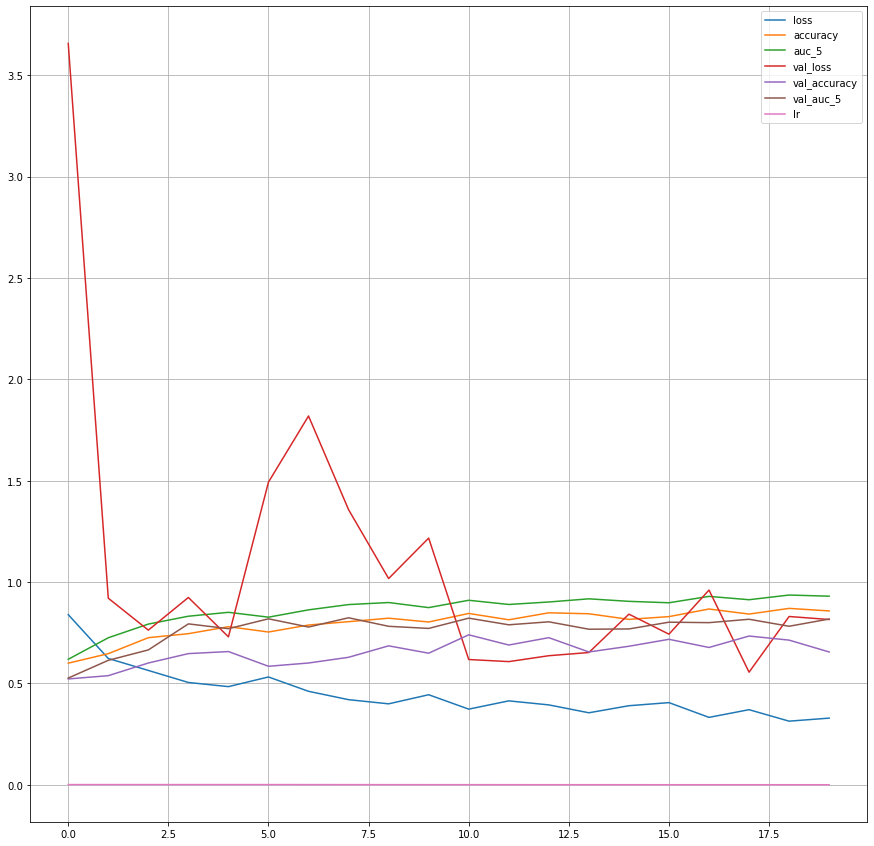

In [18]:
#model 3
m3 = keras.models.Sequential([
    keras.layers.Conv2D(32, (5,5), input_shape = [75, 75, 1], kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Conv2D(128, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(64, kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    
    keras.layers.Dense(1, activation = 'sigmoid')
])

m3.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy', keras.metrics.AUC()])
m3_history = m3.fit(train_data_img_gen.flow(X, y, batch_size = 32, subset = 'training'),
            validation_data = train_data_img_gen.flow(X, y, batch_size = 8, subset = 'validation'),
           steps_per_epoch = len(X) / 128, epochs = 20, callbacks = [exp_learning_rate_schedule])

pd.DataFrame(m3_history.history).plot(figsize=(15,15))
plt.grid(True)
plt.show()


Epoch 1/20
 1/19 [>.............................] - ETA: 0s - loss: 0.7972 - accuracy: 0.4062 - auc: 0.4980WARNING:tensorflow:From D:\Anaconda\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
20/19 [==============================] - 26s 1s/step - loss: 0.7090 - accuracy: 0.6375 - auc: 0.6944 - val_loss: 7.0814 - val_accuracy: 0.4879 - val_auc: 0.5157
Epoch 2/20
20/19 [==============================] - 28s 1s/step - loss: 0.6089 - accuracy: 0.6847 - auc: 0.7500 - val_loss: 3.2043 - val_accuracy: 0.5423 - val_auc: 0.6338
Epoch 3/20
20/19 [==============================] - 26s 1s/step - loss: 0.5572 - accuracy: 0.7359 - auc: 0.7939 - val_loss: 2.5668 - val_accuracy: 0.5665 - val_auc: 0.6894
Epoch 4/20
20/19 [==============================] - 23s 1s/step - loss: 0.4754 - accuracy: 0.7641 - auc: 0.8498 - val_l

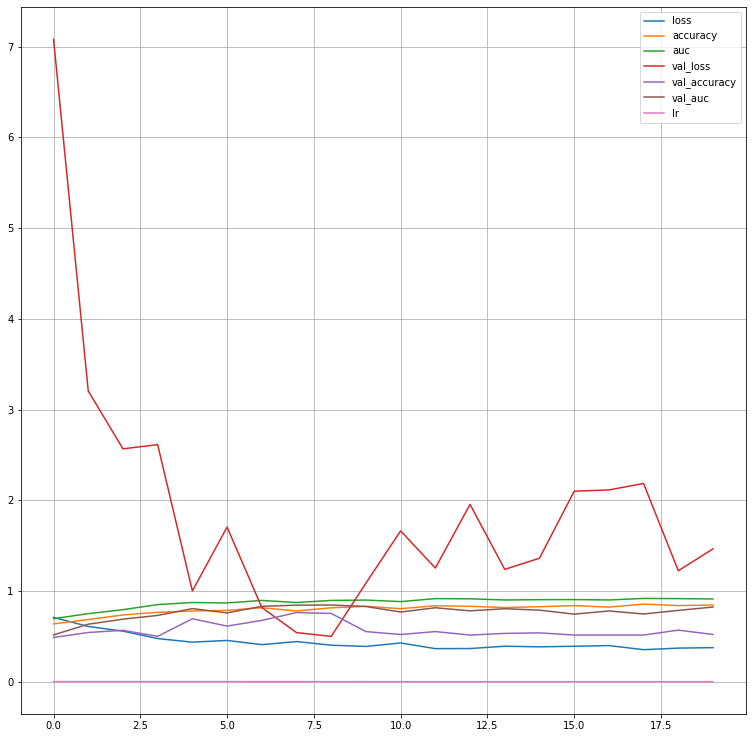

In [8]:
#model 4 - 
%load_ext tensorboard
m4_name = '32-64-128-augmented-{}'.format(int(time.time()))
m4_tb_cb = keras.callbacks.TensorBoard(log_dir = 'logsv2/{}'.format(m4_name))
%tensorboard --logdir logsv2/
m4 = keras.models.Sequential([
    keras.layers.Conv2D(32, (5,5), input_shape = [75, 75, 1], kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(32, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    
    keras.layers.Conv2D(128, (3,3), kernel_initializer = 'he_normal', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(96, kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(64, kernel_initializer = 'he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dropout(0.25),
    
    
    keras.layers.Dense(1, activation = 'sigmoid')
])

m4.compile(loss = 'binary_crossentropy', optimizer = 'Nadam', metrics = ['accuracy', keras.metrics.AUC()])
m4_history = m4.fit(train_data_img_gen.flow(X, y, batch_size = 32, subset = 'training'),
            validation_data = train_data_img_gen.flow(X, y, batch_size = 8, subset = 'validation'),
           steps_per_epoch = len(X) / 128, epochs = 20, callbacks = [exp_learning_rate_schedule, m4_tb_cb])

pd.DataFrame(m4_history.history).plot(figsize=(13,13))
plt.grid(True)
plt.show()
